In [1]:
import sys
sys.path.append('..')
import tangles
import cost_functions
import cut_finding
import importlib
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import normalized_mutual_info_score as NMI
import importlib
import time
import cut_finding
import plotting
import dataset_generation
import utils

def reload():
    importlib.reload(tangles)
    importlib.reload(cost_functions)
    importlib.reload(cut_finding)
    importlib.reload(tangles)
    importlib.reload(plotting)
    importlib.reload(dataset_generation)
    importlib.reload(utils)


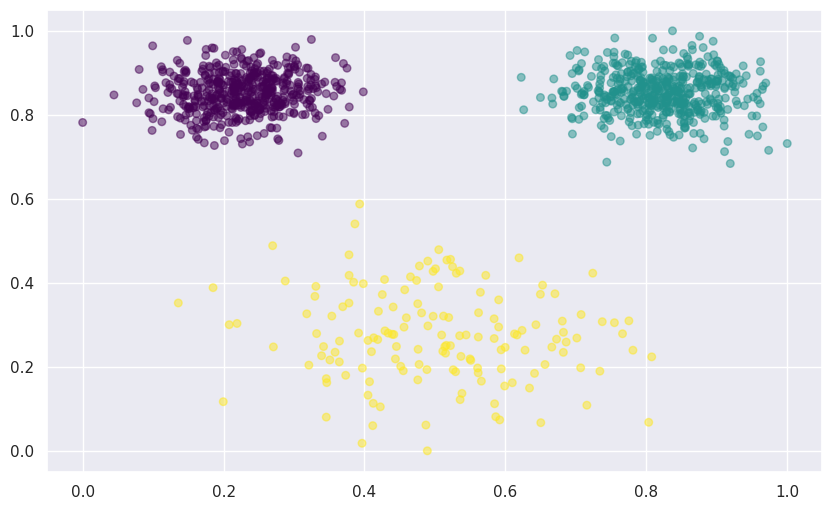

In [2]:
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
reload()
sns.set_theme(style='darkgrid')

np.random.seed(152)

data, labels = sklearn.datasets.make_blobs(
    n_samples=[500, 500, 150], n_features=2, centers=[[-2.4, 2], [2.4, 2], [0, -4]],
    cluster_std=[0.5, 0.5, 1.1], center_box=(-10.0, 10.0),
    random_state=None)

data = MinMaxScaler().fit_transform(data)

plt.figure(figsize=(10, 6))

plt.scatter(data[:, 0], data[:, 1], c=labels, s=30, cmap='viridis', alpha=0.5)

[2.59832267e-01 7.61405474e+01 3.27932074e+02 2.21537078e+03]


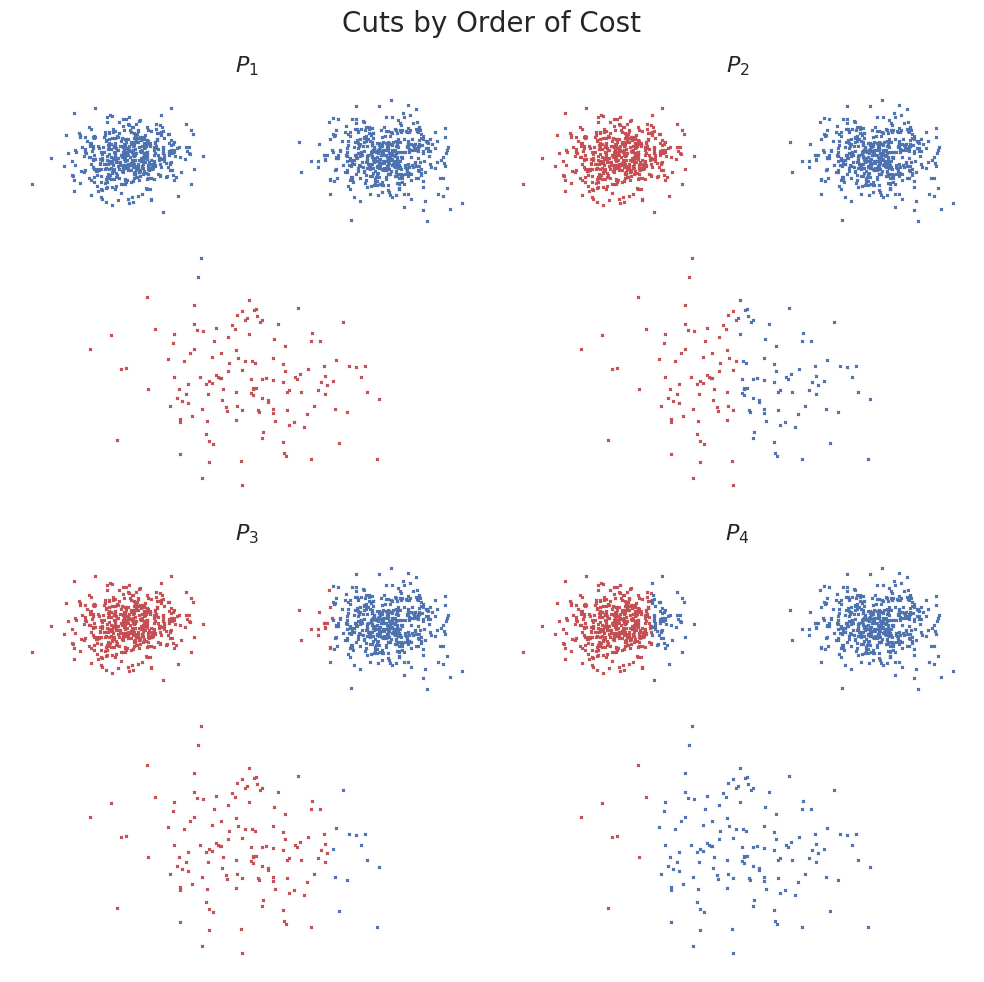

In [3]:
reload()
cuts = np.zeros((data.shape[0], 4), dtype=np.int8)

cuts[data[:, 0] < 0.3, 0] = 1
cuts[data[:, 0] < 0.5, 1] = 1
cuts[data[:, 0] < 0.7, 2] = 1
cuts[data[:, 1] < 0.5, 3] = 1

cuts_, costs = cost_functions.SimilarityMatrix(data, margin=0.1).compute(cuts)
# plotting.plot_cuts(data, cuts)
print(costs)
plotting.plot_cuts(data, cuts_, title="Cuts by Order of Cost")
plt.tight_layout()

/home/oscar/git/TanglesClustering/experiments/../tangles.py:544: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i],


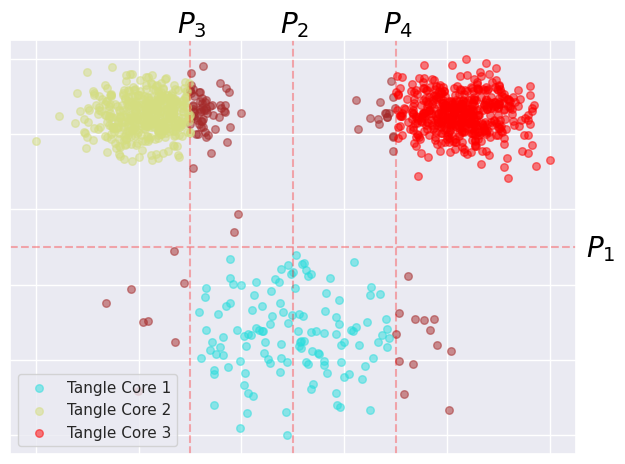

In [4]:
from functools import partial
reload()

model = tangles.TangleClustering(
    cuts=cuts, cost_class=partial(cost_functions.SimilarityMatrix, margin=0.1), agreement_param=66,
    recompute_costs_on_split=True
    )

model.fit(data)
model.plot_tangles(data, title="")
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], labels=['', '', '', '', '', ''])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], labels=['', '', '', '', '', ''])
plt.axvline(0.3, color='red', linestyle='--', alpha=0.3)
plt.axvline(0.5, color='red', linestyle='--', alpha=0.3)
plt.axvline(0.7, color='red', linestyle='--', alpha=0.3)
plt.axhline(0.5, color='red', linestyle='--', alpha=0.3)

plt.text(1.07, 0.475, r"$P_{" + str(1) + "}$", fontsize=20, color='black')
plt.text(0.475, 1.07, r"$P_{" + str(2) + "}$", fontsize=20, color='black')
plt.text(0.275, 1.07, r"$P_{" + str(3) + "}$", fontsize=20, color='black')
plt.text(0.675, 1.07, r"$P_{" + str(4) + "}$", fontsize=20, color='black')

plt.tight_layout()

plt.savefig('plots/recompute_costs_tangle_cores.png', dpi=300)

/home/oscar/git/TanglesClustering/experiments/../tangles.py:544: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i],


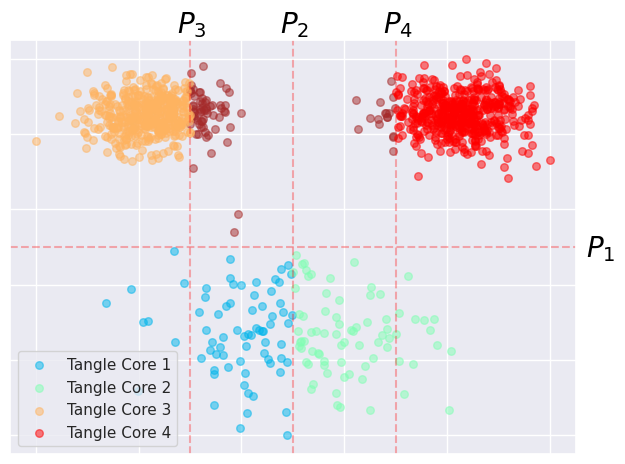

In [6]:
reload()
model = tangles.TangleClustering(
    cuts=cuts, cost_class=partial(cost_functions.SimilarityMatrix, margin=0.1), agreement_param=66)

model.fit(data)

model.plot_tangles(data, title="")

plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], labels=['', '', '', '', '', ''])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], labels=['', '', '', '', '', ''])
plt.axvline(0.3, color='red', linestyle='--', alpha=0.3)
plt.axvline(0.5, color='red', linestyle='--', alpha=0.3)
plt.axvline(0.7, color='red', linestyle='--', alpha=0.3)
plt.axhline(0.5, color='red', linestyle='--', alpha=0.3)

plt.text(1.07, 0.475, r"$P_{" + str(1) + "}$", fontsize=20, color='black')
plt.text(0.475, 1.07, r"$P_{" + str(2) + "}$", fontsize=20, color='black')
plt.text(0.275, 1.07, r"$P_{" + str(3) + "}$", fontsize=20, color='black')
plt.text(0.675, 1.07, r"$P_{" + str(4) + "}$", fontsize=20, color='black')

plt.tight_layout()

plt.savefig('plots/tangle_cores.png', dpi=300)
#

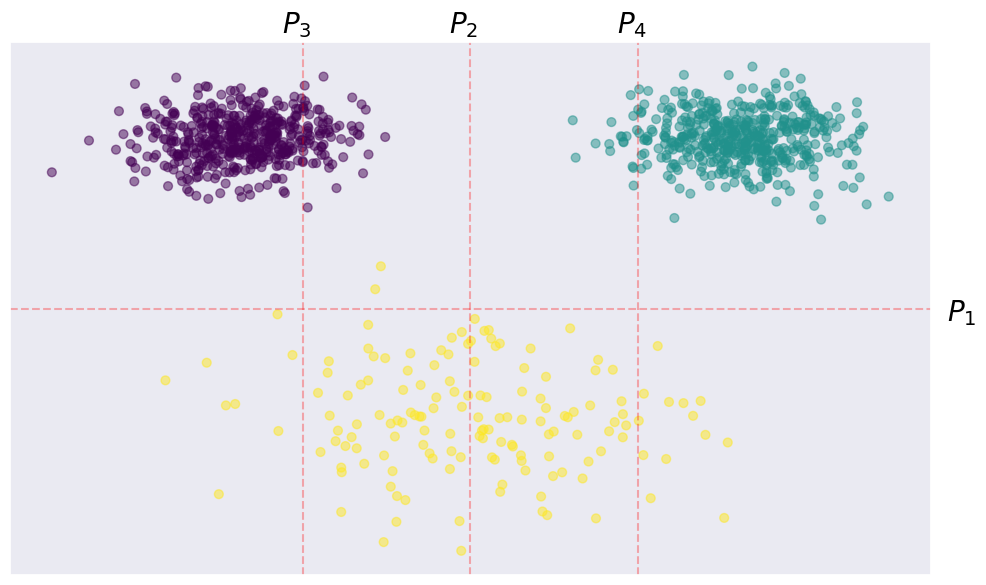

In [8]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis', alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.axvline(0.3, color='red', linestyle='--', alpha=0.3)
plt.axvline(0.5, color='red', linestyle='--', alpha=0.3)
plt.axvline(0.7, color='red', linestyle='--', alpha=0.3)
plt.axhline(0.5, color='red', linestyle='--', alpha=0.3)

plt.text(1.07, 0.475, r"$P_{" + str(1) + "}$", fontsize=20, color='black')
plt.text(0.475, 1.07, r"$P_{" + str(2) + "}$", fontsize=20, color='black')
plt.text(0.275, 1.07, r"$P_{" + str(3) + "}$", fontsize=20, color='black')
plt.text(0.675, 1.07, r"$P_{" + str(4) + "}$", fontsize=20, color='black')

plt.tight_layout()



In [9]:
reload()
model = tangles.TangleClustering(
    cuts=cuts, cost_class=partial(cost_functions.SimilarityMatrix, margin=0.1), agreement_param=66)

model.fit(data)
print(model.root)



    ___root__
   /         \
  1           -1
 / \         /  \
3   -2      4    -4



/home/oscar/git/TanglesClustering/experiments/../tangles.py:544: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i],


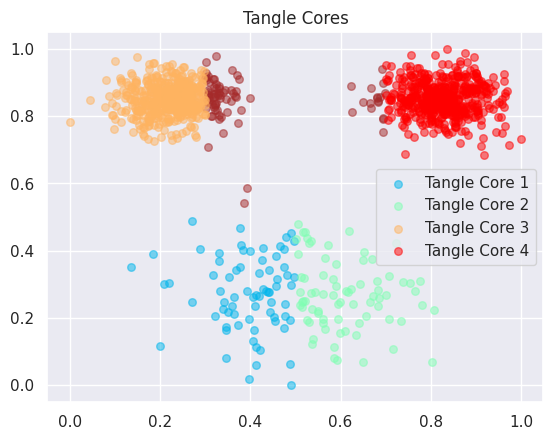

In [10]:
model.plot_tangles(data)

In [11]:
reload()
model2 = tangles.TangleClustering(
        cuts=cuts,
        cost_class=cost_functions.SimilarityMatrix,
        agreement_param=66,
        recompute_costs_on_split=True)

preds = model2.fit_predict(data)


/home/oscar/git/TanglesClustering/experiments/../tangles.py:544: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i],


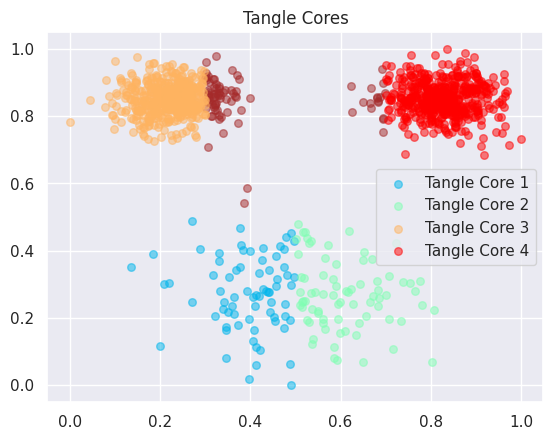

In [12]:
model.plot_tangles(data)